In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# the function was originally written by: https://stackoverflow.com/questions/52884563/loading-numpy-array-from-http-response-without-saving-a-file
def load_numpy_from_url(url):
    import requests
    import io
    import numpy as np

    response = requests.get(url)
    response.raise_for_status()
    return np.load(io.BytesIO(response.content))["arr_0"]

The following cell loads numpy from a certain urls and store the loaded numpy objects to variables - `X_train`, `X_test`, `y_train`, and `y_test`. `X_train` and `X_test` contain protein sequence information. `y_train` and `y_test` contain the cellular localization of each protein.
$i$-th element `X_train` corresponded to $i$-th element of `y_train`, $i$-th element `X_test` corresponded to $i$-th element of `y_test`.

In [2]:
X_train = load_numpy_from_url("https://github.com/hyunhwan-jeong/21-Ajou-Open-AI/blob/main/assignment-02/data/X_train.npz?raw=true")
X_test = load_numpy_from_url("https://github.com/hyunhwan-jeong/21-Ajou-Open-AI/blob/main/assignment-02/data/X_test.npz?raw=true")

y_train = load_numpy_from_url("https://github.com/hyunhwan-jeong/21-Ajou-Open-AI/blob/main/assignment-02/data/y_train.npz?raw=true")
y_test = load_numpy_from_url("https://github.com/hyunhwan-jeong/21-Ajou-Open-AI/blob/main/assignment-02/data/y_test.npz?raw=true")

The following cell shows the shape of the `X_train` and the first value of it. As you see We have $4,763$ different protein information, and it is encoded as $1,000$ characters of amino acids. 

In [11]:
print(X_train.shape)
print(X_train[0])

(4763, 1000, 20)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


The following lines show an example of value distribution of an element (a protein) in `X_train` by drawing a heatmap.

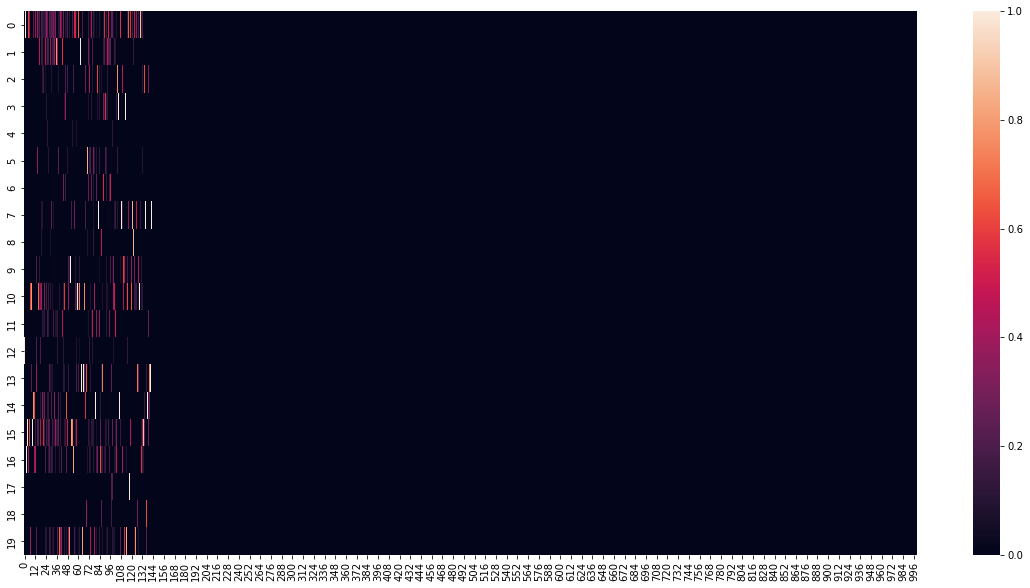

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train[2].T)
plt.show()

In [4]:
print(y_train)
print(np.unique(y_train))

[6 6 6 ... 4 4 4]
[0 1 2 3 4 5 6 7 8 9]


The following cell shows the frequency of each localization. Indices in `y_train` are corresponded to the strings at the same index. In other words, if an index in `y_train` is 2, the location of the protein is `Extracellular`.

<AxesSubplot:xlabel='count', ylabel='localization'>

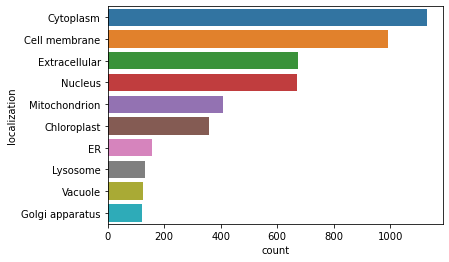

In [5]:
classes = ['Nucleus','Cytoplasm','Extracellular','Mitochondrion','Cell membrane','ER',
           'Chloroplast','Golgi apparatus','Lysosome','Vacuole']
df = pd.DataFrame({"localization": [classes[i] for i in y_train]})
sns.countplot(y = df.localization, order = df.localization.value_counts().index)